In [2]:
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy as np
from tqdm import tqdm

def invF(dt,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no', positiveoutput='no'): #same as last cell but for inverse transform
    n=np.size(A)
    f=spt.fftfreq(np.size(A),d=dt)
    t=np.arange(0,np.size(A)*dt/2,dt)
    #print(f)
    #print(t)
    #print(A)
    if absolute=='no':
        if norm=='yes':
            Y0=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y0=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=abs(spt.ifft(A))
    Y=[]
    for i in range(len(Y0)//2):      #only plots the positive part of the time domain since negative part does not have physical meaning
        Y.append(Y0[i])

    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A,'.')
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y,'.')
        if xlimt!='none':
            plt.xlim([0,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        if positiveoutput=='yes':
            return Y
        else:
            return Y0              #negative part of time domain is necessary for further transformation

        
def gendata(T,dt,noise=2,plot=True,output=True):
    n=4*int(T//dt)
    F=spt.fftfreq(n+4,d=dt)
    w=2*np.pi*F
    S=(1/w)**noise
    S[0]=S[1]
    re=[]
    im=[]
    for i in range(len(F)):
        if F[i]>=0:
            r=np.random.normal(0,1,2)
            re.append((0.5*S[i])**0.5*r[0])
    for i in range(len(re)):
        im.append(re[-i])
    y=np.concatenate([re,im])
    M=invF(dt,re,output='yes',absolute='no',positiveoutput='yes',plot='no')
    t=np.arange(0,np.size(M)*dt,dt)
    
    if plot==True:
        fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True)
        ax1.plot(F,y,'.')
        ax1.set_title('Linear')
        ax1.set_xlabel('Frequency(hz)')
        ax1.set_ylabel('sqrt Power')
        ax2.loglog(F,y,'.')
        ax2.set_xlabel('Frequency(hz)')
        ax2.set_title('Log-log')
        fig.suptitle('Sample Light Curve Frequency Space', fontsize=16)
    
        plt.figure()
        plt.plot(t,M,'.')
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Sample Light Curve Time Space',size=16)

    if output==True:
        tr=[]
        mr=[]
        for i in range(len(t)):
            tr.append(t[i])
            mr.append(np.real(M[i]))
        return tr,mr

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-2-2d5ed551530e>:55: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
100%|██████████| 100/100 [20:01<00:00, 12.02s/it]


[0.6536100075153185, 0.6755236489691976, 0.5643801456617922, 0.5752417960637832, 0.8202151800294972, 0.42796609246704825, 0.8493344102072732, 0.616919337150077, 0.8239363800794104, 0.3764408126937836, 0.5902308039835509, 0.4635231351501302, 0.5926063687082394, 0.5283424623818113, 0.40122292451501296, 0.8562084726584801, 0.5229719628327973, 0.8873429096487687, 0.6090896659700238, 0.7845071050536065, 0.4750157214423165, 0.7510359059098062, 0.7578375736731418, 0.6577530906425111, 0.623459762704077, 0.593142371946969, 0.7930904396170002, 0.6373049298322282, 0.6599703375999475, 0.5530123413068074, 0.7040597098335803, 0.8036762795216047, 0.7396754284277478, 0.4267811070122478, 0.5186432857893377, 0.5784951100618588, 0.38120059900898, 0.40825581767881725, 0.8478244372714954, 0.5638463277810781, 0.6808355172509148, 0.6946045725196999, 0.6364527942654019, 0.8591422168015416, 0.7659744816472729, 0.7771937777864828, 0.8874530724257925, 0.7812431057814717, 0.39286434264288445, 0.7546393073714619, 

0.6614754321981675

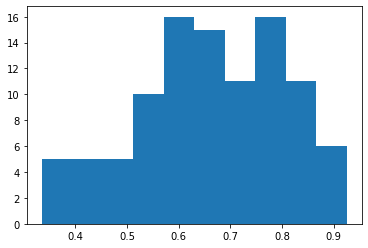

In [10]:
def getcorrelation(datafile,N,a,b,dt,strength=1,plot1=False,plot2=False,showrs=False,printoutput=False,histogram=False):
    data=np.genfromtxt(datafile, delimiter=',')
    tdata=[]
    mdata=[]
    for i in data:
        tdata.append(i[0])
        mdata.append(abs(i[1]))
    T=b-a
    ttdata0=[]
    mmdata=[]
    for i in range(len(tdata)):
        if tdata[i]>a and tdata[i]<=b:
            ttdata0.append(tdata[i])
            mmdata.append(mdata[i])
    ttdata=[]
    for i in range(len(ttdata0)):
        ttdata.append(ttdata0[i]-ttdata0[0])
    curves=[]
    for i in tqdm(range(N)):
        if plot1==True:
            plt.figure()
            curve=gendata(T,dt,plot=True)
        else:
            curve=gendata(T,dt,plot=False)
        curves.append(curve[1])  
    injecteds=[]
    for i in curves:
        yinjected=[]
        for j in range(len(mmdata)):
            yinjected.append(abs(mmdata[j]+strength*i[j]))
        if plot2==True:
            plt.figure()
            plt.plot(ttdata,yinjected,'.')
            plt.title('Trimmed ECM Data with Injected Sample Light Curve')
            plt.xlabel('Time(s)')
            plt.ylabel('Average Absolute Magnitude(V)')  
        injecteds.append(yinjected)
    rs=[]
    for i in range(len(injecteds)):
        corr_matrix = np.corrcoef(curves[i], injecteds[i])
        corr = corr_matrix[0,1]
        rs.append(corr)
    if showrs==True:
        print(rs)
    rmean=np.sum(rs)/N
    if printoutput==True:
        print(rmean)
    if histogram==True:
        plt.figure()
        rs2=np.array(rs)
        print(rs2)
        t = plt.hist(rs2, 10,)
    
    
    
    return rmean

    
    
    
getcorrelation('20220104-FRB180814.J422+73-T1.csv',100,250,1250,1/1200,strength=2,plot1=False,plot2=False,showrs=True,printoutput=True,histogram=True)

In [5]:
x=np.linspace(0,20,100)
strengths=list(x)
r=[]
for i in tqdm(strengths):
    r.append(getcorrelation('20220104-FRB180814.J422+73-T1.csv',4,250,1250,1/1200,strength=i))
plt.plot(strengths,r,'.')
plt.title('Strength of Correlation at Different Strengths of Injected Signal')
plt.xlabel('Relative Strength of Injected Signal')
plt.ylabel('Average Correlation Coefficient (4 Trials)')  

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-4-2d5ed551530e>:55: RuntimeWarning: divide by zero encountered in true_divide
  S=(1/w)**noise
  1%|          | 1/100 [01:20<2:12:40, 80.41s/it]


KeyboardInterrupt: 